In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/lgvaz/.fastai/data/imdb/test'),
 PosixPath('/home/lgvaz/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/lgvaz/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/lgvaz/.fastai/data/imdb/README'),
 PosixPath('/home/lgvaz/.fastai/data/imdb/train'),
 PosixPath('/home/lgvaz/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/lgvaz/.fastai/data/imdb/unsup')]

In [4]:
bs = 48

In [7]:
data_lm = (TextList.from_folder(path)
           .filter_by_folder(include=['train', 'test'])
           .split_by_rand_pct(0.1)
           .label_for_lm().databunch(bs=bs))
data_lm.save('tmp_lm.pkl')

In [26]:
data_lm.bs

64

In [23]:
data_lm = load_data(path, 'tmp_lm.pkl')

In [24]:
data_lm.show_batch()

idx,text
0,"xxmaj richard xxmaj benjamin supplied the sarcastic voice of reason that he does so well . xxmaj along the way there were many actors whom we all recognize , doing their usual brilliance . xxmaj there are a couple of lines in the movie which my xxup so and i have used throughout the years , but i wo n't say anything about them here . xxmaj i'm pretty sure"
1,", and yes , his use of drugs and other issues . i would of liked to know so much more about his "" xxmaj xxunk "" project . i wanted to get inside his mind . xxmaj even if they did this via some "" voice of god "" commentary and photos it would of been xxup ok . \n \n xxmaj the animations were good , but"
2,"kids with cars in high school always have something to do , and buds to do it with . xxmaj matt 's low - key attitude makes a good foil for xxmaj layne - their friendship is believable . xxmaj glover 's mannerisms are a little much , but he is consistent throughout . xxmaj he drives the plot and exudes a sense of urgency that no one else does"
3,"the one & only xxmaj al xxmaj xxunk & quite frankly i 'm offended at the pathetic 1.5 rating xxmaj brain of xxmaj blood has on the imdb , personally i think it 's terrific fun in a so bad it 's good sort of way . xxmaj the highly entertaining script by xxmaj kane xxup w. xxmaj lynn & xxmaj joe xxmaj van xxmaj rodgers is as loopy &"
4,"\n \n xxmaj sincerely yours , \n \n xxmaj alexandra xxbos xxmaj whenever xxmaj hayao xxmaj miyazaki does the "" tri - xxunk , "" ( writes , directs , and animates a movie ) he makes a classic film for the ages . xxmaj he has done it again with xxmaj gake no ue no xxmaj ponyo . \n \n xxmaj the story is about a"


In [29]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

In [31]:
learn.lr_find()

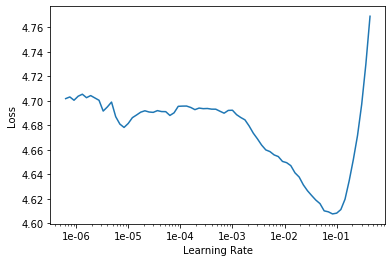

In [33]:
learn.recorder.plot(skip_end=16)

In [34]:
lr = 2e-2
learn.fit_one_cycle(1, lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.199406,4.026011,0.292361,15:42


In [35]:
learn.save('stage-1')

In [36]:
learn.load('stage-1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (45000 items)
x: LMTextList
xxbos when i know that xxmaj walter will never grace another set . i was in my 30 's when i first saw this sweet , endearing and unabashedly romantic film . i loved it from the first scene , and all the way through to the end . xxmaj art xxmaj carney was his usual daft self ; xxmaj glenda matched xxmaj walter step for step in the xxunk xxmaj richard xxmaj benjamin supplied the sarcastic voice of reason that he does so well . xxmaj along the way there were many actors whom we all recognize , doing their usual brilliance . xxmaj there are a couple of lines in the movie which my xxup so and i have used throughout the years , but i wo n't say anything about them here . xxmaj i'm pretty sure you will know which two i am talking about . xxmaj just get this movie . xxmaj make some popcorn , grab your xxunk he is as sappy as mine is , for which i am xxunk enjoy this standout romantic comedy from the 70 's . xxm

In [42]:
learn.predict('I loved the', 30, temperature=1.1)

'I loved the " jodie Foster Era " . If you watched this film in recognise WWII times a horrible , dreary movie could save it from being canceled'